<a href="https://colab.research.google.com/github/Braelin2/ECGR5105HW6/blob/main/ECGR5105_HW6_P2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch as torch
import torch.optim as optim
import torch.nn as nn

!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 8.56 s (started: 2023-12-02 02:36:59 +00:00)


In [47]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # <2>


Files already downloaded and verified
Files already downloaded and verified
time: 2.11 s (started: 2023-12-02 02:37:11 +00:00)


50000


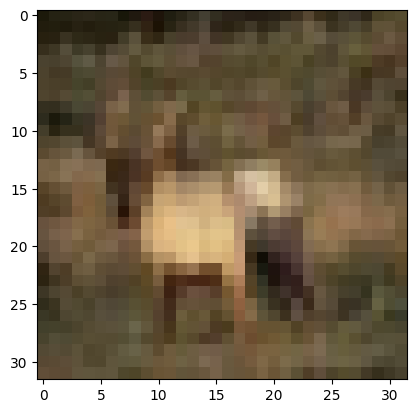

time: 433 ms (started: 2023-12-02 02:37:15 +00:00)


In [48]:
print(len(cifar10))

img, label = cifar10[3]

plt.imshow(img)
plt.show()

In [49]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

cifar10_train_t = datasets.CIFAR10(data_path, train = True, download = False, transform = transforms.ToTensor())
cifar10_test_t = datasets.CIFAR10(data_path, train = False, download = False, transform = transforms.ToTensor())


time: 1.81 s (started: 2023-12-02 02:37:21 +00:00)


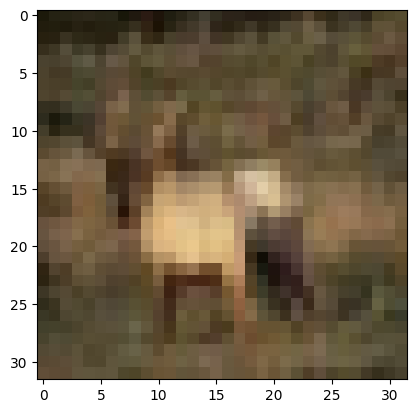

time: 360 ms (started: 2023-12-02 02:37:25 +00:00)


In [50]:
img_t, _ = cifar10_train_t[3]

plt.imshow(img_t.permute(1,2,0))
plt.show()

In [51]:
imgs = torch.stack([img_t for img_t, _ in cifar10_train_t], dim = 3)
#imgs.shape




time: 14 s (started: 2023-12-02 02:37:30 +00:00)


In [52]:
imgs.view(3,-1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

time: 63.3 ms (started: 2023-12-02 02:37:51 +00:00)


In [53]:
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

time: 1.32 s (started: 2023-12-02 02:38:01 +00:00)


In [54]:
transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

time: 3.76 ms (started: 2023-12-02 02:38:03 +00:00)


In [55]:
transformed_cifar10_train = datasets.CIFAR10(data_path, train = True, download = False,
                                            transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))]))

transformed_cifar10_test = datasets.CIFAR10(data_path, train = False, download = False,
                                            transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))]))

time: 958 ms (started: 2023-12-02 02:38:05 +00:00)


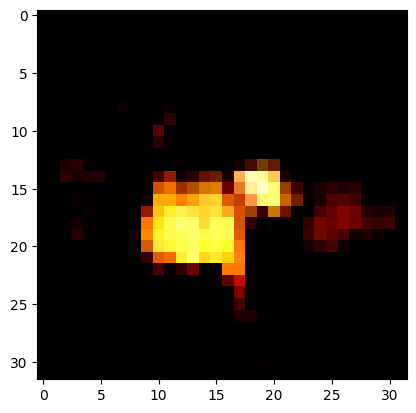

time: 208 ms (started: 2023-12-02 02:38:08 +00:00)


In [56]:
img_t, _ = transformed_cifar10_train[3]

plt.imshow(img_t.permute(1,2,0))
plt.show()

In [57]:
train_loader = torch.utils.data.DataLoader(transformed_cifar10_train, batch_size=64, shuffle=True)

model = nn.Sequential(nn.Linear(3072, 512), nn.Tanh(), nn.Linear(512, 10))

optimizer = optim.SGD(model.parameters(), lr=1e-3)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

time: 19.4 ms (started: 2023-12-02 02:38:11 +00:00)


In [58]:
for epoch in range(n_epochs):
  for imgs, labels in train_loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size, -1))
    loss = loss_fn(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 2.297484
Epoch: 1, Loss: 1.345752
Epoch: 2, Loss: 1.954965
Epoch: 3, Loss: 2.030562
Epoch: 4, Loss: 1.595050
Epoch: 5, Loss: 1.723946
Epoch: 6, Loss: 1.514890
Epoch: 7, Loss: 1.804181
Epoch: 8, Loss: 1.748773
Epoch: 9, Loss: 2.081876
Epoch: 10, Loss: 1.825911
Epoch: 11, Loss: 1.419759
Epoch: 12, Loss: 1.309417
Epoch: 13, Loss: 1.683790
Epoch: 14, Loss: 1.709401
Epoch: 15, Loss: 1.907732
Epoch: 16, Loss: 1.372549
Epoch: 17, Loss: 1.510088
Epoch: 18, Loss: 1.801955
Epoch: 19, Loss: 1.494885
Epoch: 20, Loss: 1.491810
Epoch: 21, Loss: 1.477561
Epoch: 22, Loss: 1.410873
Epoch: 23, Loss: 1.957525
Epoch: 24, Loss: 1.456182
Epoch: 25, Loss: 1.172029
Epoch: 26, Loss: 1.787056
Epoch: 27, Loss: 1.616694
Epoch: 28, Loss: 1.942243
Epoch: 29, Loss: 1.754126
Epoch: 30, Loss: 1.295626
Epoch: 31, Loss: 2.123542
Epoch: 32, Loss: 1.251279
Epoch: 33, Loss: 1.605781
Epoch: 34, Loss: 1.578850
Epoch: 35, Loss: 1.886302
Epoch: 36, Loss: 1.400659
Epoch: 37, Loss: 1.630759
Epoch: 38, Loss: 1.727

In [59]:
train_loader = torch.utils.data.DataLoader(transformed_cifar10_train, batch_size=64,shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs_training = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs_training, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f" % (correct / total))

Accuracy: 0.594880
time: 19.2 s (started: 2023-12-02 03:16:17 +00:00)


In [60]:
test_loader = torch.utils.data.DataLoader(transformed_cifar10_test, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in test_loader:
        outputs_testing = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs_testing, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy1: %f" % (correct / total))

Accuracy1: 0.491400
time: 3.32 s (started: 2023-12-02 03:16:40 +00:00)


In [61]:
print(sum([p.numel() for p in model.parameters()]))

1578506
time: 580 µs (started: 2023-12-02 03:16:51 +00:00)
